In [226]:
import pandas as pd
import random
import os
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.filterwarnings(action='ignore')
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [227]:
def seed_everything(seed):
    random.seed(seed) #파이썬 자체 모듈 random 모듈의 시드 고정
    os.environ['PYTHONHASHSEED'] = str(seed) 
    np.random.seed(seed) #넘파이를 사용할 경우

seed_everything(37) # Seed 고정

# Data Load

In [201]:
#데이터프레임 불러오기
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')
sub4 = pd.read_csv('./sample_submission.csv')
sub5 = pd.read_csv('./sample_submission.csv')
sub6 = pd.read_csv('./sample_submission.csv')

In [151]:
submission5 = pd.read_csv('./sample_submission.csv')

In [170]:
submission6 = pd.read_csv('./sample_submission.csv')

In [161]:
train_df

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,TRAIN_593,1,0.526546,2022-09-08 14:30,T100306,T_31,2.0,95.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN
595,TRAIN_595,0,0.521289,2022-09-08 22:47,T050304,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
596,TRAIN_596,1,0.531375,2022-09-08 14:38,T100304,O_31,40.0,94.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [158]:
train_df[train_df['X_1'].isnull()]

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,39.34,40.89,32.56,34.09,77.77,NaN,NaN,NaN,NaN,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,38.89,42.82,43.92,35.34,72.55,NaN,NaN,NaN,NaN,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,39.19,36.65,42.47,36.53,78.35,NaN,NaN,NaN,NaN,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,37.74,39.17,52.17,30.58,71.78,NaN,NaN,NaN,NaN,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,38.70,41.89,46.93,33.09,76.97,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
583,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,NaN,NaN,NaN,NaN,...,51.71,59.64,54.61,57.05,63.18,1.0,NaN,NaN,NaN,NaN
584,TRAIN_584,0,0.519519,2022-09-05 11:09,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
585,TRAIN_585,0,0.515214,2022-09-05 11:17,T010306,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN


In [160]:
hier = train_df[train_df['X_1'].isnull()].groupby(['PRODUCT_CODE', 'LINE'])['X_1'].count()
hier

PRODUCT_CODE  LINE   
A_31          T010305    0
              T010306    0
              T050304    0
              T050307    0
Name: X_1, dtype: int64

In [146]:
train_df_pl = train_df[(train_df['PRODUCT_CODE']=='A_31') & (train_df['LINE']=='T010305')]
train_df_pl

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
28,TRAIN_028,0,0.521249,2022-06-19 20:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,TRAIN_033,1,0.526656,2022-06-21 7:14,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,TRAIN_039,1,0.531583,2022-06-22 4:45,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,TRAIN_040,1,0.530829,2022-06-22 12:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
41,TRAIN_041,1,0.528270,2022-06-22 12:34,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,TRAIN_048,1,0.533273,2022-06-23 15:50,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
52,TRAIN_052,2,0.555514,2022-06-24 4:13,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,TRAIN_057,2,0.535741,2022-06-24 21:38,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
58,TRAIN_058,2,0.537122,2022-06-24 21:46,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59,TRAIN_059,2,0.536859,2022-06-24 22:39,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [186]:
test_df[test_df['PRODUCT_CODE']=='A_31']

,PRODUCT_ID,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
3,TEST_003,2022-09-09 10:56,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,TEST_004,2022-09-09 11:04,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,TEST_005,2022-09-09 19:35,T010306,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,TEST_006,2022-09-09 19:43,T010305,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,TEST_007,2022-09-10 12:27,T050304,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,57.74,52.51,54.45,57.99,63.16,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,TEST_284,2022-11-03 9:53,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,52.97,58.06,44.11,56.33,62.00,1.0,263.4,257.5,261.0,236.3
285,TEST_285,2022-11-03 10:01,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,54.24,55.55,51.60,48.53,61.95,1.0,267.6,278.6,271.4,243.3
286,TEST_286,2022-11-03 11:31,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,58.06,57.92,49.06,48.26,62.77,1.0,199.0,223.8,169.7,198.7
292,TEST_292,2022-11-04 0:31,T050307,A_31,NaN,NaN,NaN,NaN,NaN,NaN,...,53.55,52.68,49.97,56.66,63.52,1.0,210.5,214.6,201.6,191.9


In [13]:
submission.head()

,PRODUCT_ID,Y_Class
0,TEST_000,0
1,TEST_001,0
2,TEST_002,0
3,TEST_003,0
4,TEST_004,0


위 세 가지 데이터 프레임을 보고 우리가 무엇을 예측해야하는지 알 수 있다.

In [188]:
y0 = train_df['X_300'][train_df['Y_Class']==0].mean()
y0

79.23157894736845

# Data Preprocessing

데이터 전처리(Data preprocessing)의 목적은 

주어진원본 데이터를 신경망에 적용하기 쉽도록 만드는 것이다.

벡터화(vectorization), 정규화(normalization), 

특성 추출(Feature Engineering)등이 포함된다.

### Feature Engineering

**train data 필요없는 column 삭제** (점수가 더 낮아진다. 이제 사용 x)

In [4]:
# del_allnull = []
# for i in train_df.columns:
#     if train_df[i].isnull().sum() == 598:
# #         print(i)
#         del_allnull.append(i)
#         del train_df[i]
        
# train_df.head()

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,NaN,NaN,NaN,NaN,...,189.0,383.0,368.296296,353.0,39.34,40.89,32.56,34.09,77.77,NaN
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,NaN,NaN,NaN,NaN,...,185.6,383.0,367.735849,353.0,38.89,42.82,43.92,35.34,72.55,NaN
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,NaN,NaN,NaN,NaN,...,165.5,383.0,367.320755,353.0,39.19,36.65,42.47,36.53,78.35,NaN
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,NaN,NaN,NaN,NaN,...,165.8,384.0,369.188679,353.0,37.74,39.17,52.17,30.58,71.78,NaN
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,NaN,NaN,NaN,NaN,...,182.6,383.0,367.351852,352.0,38.70,41.89,46.93,33.09,76.97,NaN


In [5]:
# del_allzero = []
# for i in train_df.columns:
#     if train_df[i].sum() == 0.0:
# #         print(i)
#         del_allzero.append(i)
#         del train_df[i]
        
# train_df.describe()

,Y_Class,Y_Quality,X_1,X_2,X_4,X_5,X_7,X_8,X_9,X_10,...,X_2862,X_2863,X_2864,X_2865,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871
count,598.000000,598.000000,349.000000,349.000000,349.0,349.000000,349.000000,349.000000,349.000000,349.0,...,249.000000,249.000000,249.000000,249.000000,100.000000,100.00000,100.000000,100.000000,100.00000,99.0
mean,1.025084,0.530896,2.409742,95.123209,45.0,10.392550,48.802292,10.048711,41.469914,2.0,...,163.290763,423.558233,406.088187,388.064257,50.807300,53.60770,49.606200,51.659800,66.64970,1.0
std,0.565069,0.007401,5.895256,4.107640,0.0,0.489019,4.373824,0.215571,10.515032,0.0,...,11.514477,38.335184,37.299901,36.054561,7.011828,8.13899,7.158917,8.913065,4.52781,0.0
min,0.000000,0.500856,1.000000,87.000000,45.0,10.000000,45.000000,10.000000,31.000000,2.0,...,125.700000,373.000000,357.698113,342.000000,32.120000,31.70000,32.560000,30.490000,61.67000,1.0
25%,1.000000,0.527535,2.000000,93.000000,45.0,10.000000,45.000000,10.000000,31.000000,2.0,...,157.200000,384.000000,368.296296,352.000000,49.485000,52.20000,42.160000,49.915000,63.64500,1.0
50%,1.000000,0.530436,2.000000,95.000000,45.0,10.000000,45.000000,10.000000,31.000000,2.0,...,163.300000,446.000000,427.867925,406.000000,53.425000,55.92500,51.460000,56.175000,65.14000,1.0
75%,1.000000,0.533433,2.000000,98.000000,45.0,11.000000,51.000000,10.000000,52.000000,2.0,...,169.100000,465.000000,443.807692,423.000000,55.287500,58.97500,55.030000,57.175000,67.11500,1.0
max,2.000000,0.578841,103.000000,102.000000,45.0,11.000000,62.000000,11.000000,52.000000,2.0,...,194.600000,473.000000,450.692308,434.000000,60.240000,68.66000,60.410000,59.930000,79.75000,1.0


### Feature Selection

데이터 전처리. 결측값을 각 column의 평균값으로 채운다.

In [202]:
train_df = train_df.fillna(-100) #결측치를 평균값으로 채운다.
test_df = test_df.fillna(-100)

In [203]:
train_y = train_df['Y_Class']

학습에 쓰이지 않을 column들을 제거한다.

In [204]:
train_x = train_df.drop(columns = ['PRODUCT_ID', 'TIMESTAMP', 'Y_Class', 'Y_Quality'])
#모델 학습이 끝나고 예측에 쓰일 test데이터
test_x = test_df.drop(columns=['PRODUCT_ID', 'TIMESTAMP'])

범주형 데이터를 수치 데이터로 전환하기 위해 LabelEncoder 활용

In [205]:
# qualitative to quantitative
qual_col = ['LINE', 'PRODUCT_CODE']

for i in qual_col:
    le = LabelEncoder()
    le = le.fit(train_x[i]) #원래 column 값을 기준으로 fit.
    train_x[i] = le.transform(train_x[i]) #수치화, 수치로 변형
    
    for label in np.unique(test_x[i]): 
        if label not in le.classes_: 
            le.classes_ = np.append(le.classes_, label)
    test_x[i] = le.transform(test_x[i]) 
print('Done.')

Done.


In [19]:
train_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.3400,40.8900,32.5600,34.0900,77.7700,1.0,0.0,0.0,0.0,0.0
1,3,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,38.8900,42.8200,43.9200,35.3400,72.5500,1.0,0.0,0.0,0.0,0.0
2,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,39.1900,36.6500,42.4700,36.5300,78.3500,1.0,0.0,0.0,0.0,0.0
3,3,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,37.7400,39.1700,52.1700,30.5800,71.7800,1.0,0.0,0.0,0.0,0.0
4,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,38.7000,41.8900,46.9300,33.0900,76.9700,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,5,2,2.000000,95.000000,0.0,45.0,10.00000,0.0,50.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
594,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,49.4700,53.0700,50.8900,55.1000,66.4900,1.0,0.0,0.0,0.0,0.0
595,2,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
596,4,1,40.000000,94.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


In [20]:
test_x

,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,X_5,X_6,X_7,X_8,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,5,2,2.000000,94.000000,0.0,45.0,10.00000,0.0,51.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
1,4,2,2.000000,93.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
2,4,2,2.000000,95.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
3,0,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
4,1,0,2.409742,95.123209,0.0,45.0,10.39255,0.0,48.802292,10.048711,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,5,2,2.000000,91.000000,0.0,45.0,10.00000,0.0,51.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
306,4,2,2.000000,96.000000,0.0,45.0,11.00000,0.0,45.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
307,5,2,2.000000,91.000000,0.0,45.0,10.00000,0.0,50.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0
308,5,2,2.000000,95.000000,0.0,45.0,10.00000,0.0,51.000000,10.000000,...,50.8073,53.6077,49.6062,51.6598,66.6497,1.0,0.0,0.0,0.0,0.0


### Modeling

1.모델 선택 - sklearn라이브러리 활용 - RandomForest 

2.모델 학습 - train_df를 활용하여 1번에서 정의한 모델로 학습

3.예측 - 학습된 모델을 바탕으로 test 데이터를 예측

4.정답 파일 생성 - 정답 파일 생성 및 제출 필요(경진대회를 위해 필요한 과정.)

# Adaboost

In [51]:
#Adaboost
from sklearn.ensemble import AdaBoostClassifier

Adab_clf = AdaBoostClassifier(n_estimators=1, 
                        random_state=37, 
                        learning_rate=0.005)
Adab_clf.fit(train_x, train_y)


### GridSearchCV 파라미터 최적화

In [56]:
#Adaboost 파라미터 최적화를 위한 GridSearchCV
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [1,2,3,4,5,10,20],
    'learning_rate' : [0.005, 0.01,0.015, 0.02,0.03]
}

grid_cv = GridSearchCV(Adab_clf, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(train_x, train_y.values)
preds = grid_cv.predict(test_x)
submission['Y_Class'] = preds
submission.to_csv('./t11_adaboost.csv', index=False)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 35 candidates, totalling 70 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.005, 'n_estimators': 1}
최고 예측 정확도: 0.6438


# GBM gradient boosting machine

### default 파라미터 값으로 모델 학습 및 예측

In [73]:
#GBM Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier 

# 예시 데이터셋 불러오기
GBM_clf = GradientBoostingClassifier(random_state=37)
GBM_clf.fit(train_x, train_y.values)
preds = GBM_clf.predict(test_x)
submission['Y_Class'] == preds
submission.to_csv('./t11_GBM_defualt.csv', index = False)

### RamdomSearchCV 파라미터 최적화

In [207]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier 
from scipy.stats import randint
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import time

param_distribs = {
    'n_estimators' : randint(low=1, high=200),
    #'learning_rate' : randint(low=0.01, high=0.1),
    'min_samples_split': randint(low = 1, high = 10),
    'min_samples_leaf': randint(low = 1, high = 17)
}

GBM= GradientBoostingClassifier(random_state=37)

kfold = KFold(n_splits=5, shuffle=True, random_state=37)
results = cross_val_score(GBM, train_x, train_y, cv=kfold)
print(results)
start = time.time()
rand_cv = RandomizedSearchCV(GBM, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_iter = 50,
                            scoring = 'f1_macro',
                            n_jobs = -1,
                            verbose=3)
rand_cv.fit(train_x, train_y)
preds = rand_cv.predict(test_x)
end = time.time()
sub3['Y_Class'] = preds
sub3.to_csv('./t10_GBM_RandomSearchCV_niter15_dpo-1000_niter50.csv', index=False)

print(f'최적 하이퍼 파라미터: {rand_cv.best_params_}')
print(f'최고 예측 정확도: {(rand_cv.best_score_)*100:.4f}')
print(f'time elapsed: {end-start}')

[0.78333333 0.79166667 0.78333333 0.78991597 0.76470588]
Fitting 5 folds for each of 50 candidates, totalling 250 fits
최적 하이퍼 파라미터: {'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 157}
최고 예측 정확도: 41.3178
time elapsed: 1106.4138910770416


In [231]:
sub0 = pd.read_csv('./t10_GBM_RandomSearchCV.csv')
sub1 = pd.read_csv('./t10_GBM_RandomSearchCV_niter50.csv')
sub2 = pd.read_csv('./t10_GBM_RandomSearchCV_niter50_re.csv')
# sub3 = pd.read_csv('./t14_GBM_RandomSearchCV_niter50_dpo.csv') #결과가 다 1로 나옴
sub4 = pd.read_csv('./t10_GBM_RandomSearchCV_niter50_dpo-1000.csv') #그냥 모든 결측치 -1000로 채우기
# sub5 = pd.read_csv('./t15_GBM_RandomSearchCV_niter50_dpo2-1000.csv') #모든행 결측치 -1000 나머지는 평균값 채우기
# sub6 = pd.read_csv('./t15_GBM_RandomSearchCV_niter50_dpo3-1000.csv')# 모든 결측치-1000으로 채우기
sub7 = pd.read_csv('./t15_XGBoost_RandomSearchCV_niter50_dpo4-100.csv')
sub8 = pd.read_csv('./t15_GBMXGBVotingsoft_RandomSearchCV_niter50_dpo4-100.csv')
# sub9 = pd.read_csv()
sub = pd.concat([sub0, sub1, sub4, sub7, sub8], axis = 1)
sub.columns = ['GBMrandom60', 'Y_Class0', 'GBMrandom64', 'Y_Class1', 'GBMrandomf-1000', 'Y_Class4', 
               'GBMrandomf-100', 'Y_Class7', 'XGBrandomf-100', 'Y_Class8']
sub

,GBMrandom60,Y_Class0,GBMrandom64,Y_Class1,GBMrandomf-1000,Y_Class4,GBMrandomf-100,Y_Class7,XGBrandomf-100,Y_Class8
0,TEST_000,1,TEST_000,1,TEST_000,1,TEST_000,1,TEST_000,1
1,TEST_001,1,TEST_001,1,TEST_001,1,TEST_001,1,TEST_001,1
2,TEST_002,1,TEST_002,1,TEST_002,1,TEST_002,1,TEST_002,1
3,TEST_003,1,TEST_003,1,TEST_003,1,TEST_003,1,TEST_003,1
4,TEST_004,1,TEST_004,0,TEST_004,1,TEST_004,1,TEST_004,1
...,...,...,...,...,...,...,...,...,...,...
305,TEST_305,1,TEST_305,2,TEST_305,1,TEST_305,1,TEST_305,1
306,TEST_306,1,TEST_306,2,TEST_306,0,TEST_306,1,TEST_306,1
307,TEST_307,1,TEST_307,1,TEST_307,1,TEST_307,1,TEST_307,1
308,TEST_308,1,TEST_308,2,TEST_308,1,TEST_308,1,TEST_308,1


In [232]:
sub8.describe()

,Y_Class
count,310.000000
mean,0.883871
std,0.376577
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [229]:
sub.iloc[20:40, :]

,GBMrandom60,Y_Class0,GBMrandom64,Y_Class1,GBMrandomf-1000,Y_Class4,GBMrandomf-100,Y_Class7
20,TEST_020,1,TEST_020,1,TEST_020,1,TEST_020,1
21,TEST_021,2,TEST_021,1,TEST_021,1,TEST_021,1
22,TEST_022,1,TEST_022,1,TEST_022,1,TEST_022,1
23,TEST_023,1,TEST_023,1,TEST_023,1,TEST_023,1
24,TEST_024,1,TEST_024,1,TEST_024,1,TEST_024,1
25,TEST_025,1,TEST_025,1,TEST_025,1,TEST_025,1
26,TEST_026,1,TEST_026,1,TEST_026,1,TEST_026,1
27,TEST_027,1,TEST_027,1,TEST_027,1,TEST_027,1
28,TEST_028,1,TEST_028,1,TEST_028,1,TEST_028,1
29,TEST_029,1,TEST_029,1,TEST_029,1,TEST_029,1


In [230]:
sub7.describe()

,Y_Class
count,310.000000
mean,1.016129
std,0.363903
min,0.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,2.000000


In [209]:
sub.iloc[40:60,:]

,PRODUCT_ID,Y_Class,PRODUCT_ID,Y_Class,PRODUCT_ID,Y_Class,PRODUCT_ID,Y_Class,PRODUCT_ID,Y_Class
40,TEST_040,0,TEST_040,0,TEST_040,0,TEST_040,1,TEST_040,0
41,TEST_041,0,TEST_041,0,TEST_041,0,TEST_041,1,TEST_041,0
42,TEST_042,0,TEST_042,0,TEST_042,0,TEST_042,1,TEST_042,0
43,TEST_043,1,TEST_043,0,TEST_043,1,TEST_043,1,TEST_043,1
44,TEST_044,1,TEST_044,0,TEST_044,0,TEST_044,1,TEST_044,0
45,TEST_045,1,TEST_045,1,TEST_045,1,TEST_045,1,TEST_045,1
46,TEST_046,1,TEST_046,0,TEST_046,1,TEST_046,1,TEST_046,1
47,TEST_047,1,TEST_047,0,TEST_047,1,TEST_047,1,TEST_047,1
48,TEST_048,1,TEST_048,1,TEST_048,1,TEST_048,1,TEST_048,1
49,TEST_049,1,TEST_049,0,TEST_049,1,TEST_049,1,TEST_049,1


In [116]:
#GBM Gradient Boosting Machine
from sklearn.ensemble import GradientBoostingClassifier 

# 예시 데이터셋 불러오기
GBM_clf4 = GradientBoostingClassifier(random_state=37, 
                                      min_samples_leaf = 16, 
                                      min_samples_split = 2, 
                                      n_estimators = 88)
GBM_clf4.fit(train_x, train_y.values)
preds = GBM_clf4.predict(test_x)
submission6 = pd.read_csv('./sample_submission.csv')
submission6['Y_Class'] == preds
submission6.to_csv('./t11_GBM_grid_refit.csv', index = False)

### GridSearchCV 파라미터 최적화

In [74]:
#GBM 파라미터 최적화를 위한 GridSearchCV
from sklearn.model_selection import GridSearchCV

param = {
    'n_estimators' : [10,20,30,50],
    'learning_rate' : [0.01, 0.02, 0.05],
    'min_samples_split':[1,2,3,4,8],
    'min_samples_leaf':[1,8,16,17]
    
}
GBM_clf3 = GradientBoostingClassifier(random_state=37)

grid_cv = GridSearchCV(GBM_clf3, param_grid=param, cv=2, verbose=1, n_jobs=-1)
grid_cv.fit(train_x, train_y.values)
preds = grid_cv.predict(test_x)
submission3['Y_Class'] = preds
submission3.to_csv('./t11_GBM_GridSearchCV.csv', index=False)
print('최적 하이퍼 파라미터: \n', grid_cv.best_params_)
print('최고 예측 정확도: {0:.4f}'.format(grid_cv.best_score_))

Fitting 2 folds for each of 240 candidates, totalling 480 fits
최적 하이퍼 파라미터: 
 {'learning_rate': 0.05, 'min_samples_leaf': 17, 'min_samples_split': 2, 'n_estimators': 10}
최고 예측 정확도: 0.6906


### Bayesian Optimization

In [90]:
import sys   
!{sys.executable} -m pip install bayesian-optimization

In [100]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

gbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }
 
 
def gbm_bo(n_estimators, max_depth, subsample):

    gbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

    gbm = GradientBoostingClassifier(**gbm_params)
    train_xx, valid_x, train_yy, valid_y = train_test_split(train_x, train_y, test_size = 0.2)
    gbm.fit(train_x,train_y)

    score = accuracy_score(valid_y, gbm.predict(valid_x))

    return score
 
BO_gbm = BayesianOptimization(f = gbm_bo, pbounds = gbm_parameter_bounds, random_state = 37)
 
BO_gbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... | subsample |
-------------------------------------------------------------
| 1         | 0.975     | 2.889     | 62.49     | 0.5964    |
| 2         | 0.9417    | 2.164     | 73.41     | 0.8421    |
| 3         | 0.8917    | 1.207     | 82.18     | 0.641     |
| 4         | 0.9917    | 2.507     | 85.49     | 0.8137    |
| 5         | 0.9417    | 1.887     | 97.44     | 0.9485    |
| 6         | 0.9417    | 2.972     | 33.21     | 0.8043    |
| 7         | 0.9333    | 2.837     | 59.74     | 0.6364    |
| 8         | 0.9       | 1.779     | 73.77     | 0.9963    |
| 9         | 0.9417    | 2.778     | 38.93     | 0.7149    |
| 10        | 0.9333    | 2.948     | 62.54     | 0.6005    |


In [122]:
from bayes_opt import BayesianOptimization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

gbm_parameter_bounds = {
                      'n_estimators' : (30,100),
                      'max_depth' : (1,3), # 나무의 깊이
                      'subsample' : (0.5,1)
                      }

 
def gbm_bo(n_estimators, max_depth, subsample):
    

    gbm_params = {
              'n_estimators' : int(round(n_estimators)),
              'max_depth' : int(round(max_depth)),
               'subsample' : int(round(subsample)),      
              }

    gbm = GradientBoostingClassifier(**gbm_params)
    train_xx, valid_x, train_yy, valid_y = train_test_split(train_x, train_y, test_size = 0.2)
    gbm.fit(train_x,train_y)

    score = f1_score(valid_y, gbm.predict(valid_x), average = 'macro')

    return score
 
BO_gbm = BayesianOptimization(f = gbm_bo, pbounds = gbm_parameter_bounds, random_state = 37)
 
BO_gbm.maximize(init_points = 5, n_iter = 5)

|   iter    |  target   | max_depth | n_esti... | subsample |
-------------------------------------------------------------
| 1         | 0.9524    | 2.889     | 62.49     | 0.5964    |
| 2         | 0.9256    | 2.164     | 73.41     | 0.8421    |
| 3         | 0.8747    | 1.207     | 82.18     | 0.641     |
| 4         | 0.9552    | 2.507     | 85.49     | 0.8137    |
| 5         | 0.9466    | 1.887     | 97.44     | 0.9485    |
| 6         | 0.8841    | 2.972     | 33.21     | 0.8043    |
| 7         | 0.9662    | 2.837     | 59.74     | 0.6364    |
| 8         | 0.8973    | 1.605     | 60.82     | 0.535     |
| 9         | 0.8932    | 2.778     | 38.93     | 0.7149    |
| 10        | 0.9628    | 2.828     | 59.79     | 0.6291    |


### Bayesian Optimization으로 최적화한 파라미터로 학습 및 예측

In [104]:
#accuracy acore
gbm_tune = GradientBoostingClassifier(random_state = 37, max_depth = 3, n_estimators = 85, subsample = 0.8137)

gbm_tune.fit(train_x,train_y)
preds = gbm_tune.predict(test_x)
submission5['Y_Class']==preds
submission5.to_csv('./t11_GBM_BayesianOptimization.csv', index = False)

In [123]:
#macro_f1_score
gbm_tune_macrof1 = GradientBoostingClassifier(random_state = 37, max_depth = 3, n_estimators = 60, subsample = 0.6364)

gbm_tune_macrof1.fit(train_x,train_y)
preds = gbm_tune_macrof1.predict(test_x)
submission7 = pd.read_csv('./sample_submission.csv')
submission7['Y_Class'] == preds
submission7.to_csv('./t11_GBM_bayesian_macro_f1_score.csv', index = False)

# XGBoost

In [172]:
import sys   
!{sys.executable} -m pip install xgboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 1.7 MB/s eta 0:00:0000:0100:01


In [174]:
from xgboost import plot_importance
from xgboost import XGBClassifier


# Train the model
xgboost = XGBClassifier(seed=seed_everything).fit(train_x,train_y)
# Make prediction
preds = xgboost.predict(test_x)

# Get predicted probability
xgboost_predict_prob = xgboost.predict_proba(test_x)[:,1]
print(xgboost_predict_prob)
print(xgboost_predict_prob)
# submission6['Y_Class'] = preds
# submission6.to_csv('./t10_XGBoost.csv', index=False)

[0.97524023 0.76055276 0.9606851  0.95079786 0.9355792  0.8795549
 0.95528793 0.46537116 0.57488114 0.80534035 0.965471   0.9708265
 0.88220626 0.03002537 0.01907506 0.9649205  0.95604277 0.9392911
 0.9634336  0.8019514  0.98246014 0.8210974  0.8700386  0.9577024
 0.9890794  0.99138993 0.6456624  0.91189444 0.86897516 0.52156276
 0.9948606  0.981547   0.9819785  0.9711051  0.914436   0.00345837
 0.31155488 0.08863046 0.25241718 0.01709741 0.22607182 0.02521303
 0.03220967 0.87542164 0.9421753  0.8426447  0.44357598 0.7881315
 0.96640676 0.9117605  0.9703321  0.94064844 0.14653385 0.4524743
 0.507756   0.97005504 0.9735975  0.97739786 0.90497744 0.96379215
 0.9240928  0.5828189  0.01357585 0.00361323 0.00428094 0.0172539
 0.37333807 0.9789605  0.9739865  0.85416245 0.9575315  0.23603052
 0.38589    0.98211664 0.99259335 0.93764794 0.984728   0.9586333
 0.7138484  0.8380824  0.9480742  0.78690207 0.94963205 0.9701517
 0.83516604 0.98546046 0.55133325 0.9904743  0.5138626  0.8482526
 0.91

In [184]:
print(len(xgboost_predict_prob[xgboost_predict_prob>0.8]))

247
[23:32:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 5/5] END alpha=5, colsample_bytree=0, eta=0, gamma=3, lambda=3, max_depth=9, min_child_weight=4, num_boost_around=14, sub_sample=0;, score=0.321 total time=   2.6s
[23:32:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core,

[23:32:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END alpha=5, colsample_bytree=0, eta=0, gamma=3, lambda=3, max_depth=9, min_child_weight=4, num_boost_around=14, sub_sample=0;, score=0.464 total time=   2.6s
[23:32:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or 

[23:32:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END alpha=8, colsample_bytree=0, eta=0, gamma=8, lambda=7, max_depth=5, min_child_weight=8, num_boost_around=14, sub_sample=0;, score=0.271 total time=   2.7s
[23:32:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or 

[23:32:38] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 3/5] END alpha=8, colsample_bytree=0, eta=0, gamma=8, lambda=7, max_depth=5, min_child_weight=8, num_boost_around=14, sub_sample=0;, score=0.294 total time=   2.7s
[23:32:40] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-37/xgboost/src/learner.cc:627: 
Parameters: { "num_boost_around", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or 

### RandomSearchCV

In [176]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'eta' : randint(low=0, high=1),
    'min_child_weight': randint(low = 1, high = 10),
    'gamma': randint(low = 1, high = 10),
    'max_depth': randint(low = 5, high = 10),
    'colsample_bytree' : randint(low = 0, high = 1),
    'lambda' : randint(low = 1, high = 10),
    'alpha' : randint(low = 1, high = 10)
}

xgboost_r = XGBClassifier(seed=37).fit(train_x,train_y)
rand_cv = RandomizedSearchCV(xgboost_r, 
                            param_distributions=param_distribs,
                            cv = 5, 
                            n_iter = 15,
                            scoring = 'f1_macro',
                            n_jobs = -1,
                            verbose=3)
rand_cv.fit(train_x, train_y)
preds = rand_cv.predict(test_x)
submission8 = pd.read_csv('./sample_submission.csv')
submission8['Y_Class'] = preds
submission8.to_csv('./t11_XGB_Random_niter15.csv', index=False)

print(f'최적 하이퍼 파라미터: {rand_cv.best_params_}')
print(f'최고 예측 정확도: {(rand_cv.best_score_)*100:.4f}')

Fitting 5 folds for each of 15 candidates, totalling 75 fits
최적 하이퍼 파라미터: {'alpha': 9, 'colsample_bytree': 0, 'eta': 0, 'gamma': 1, 'lambda': 7, 'max_depth': 7, 'min_child_weight': 8}
최고 예측 정확도: 42.4913


In [ ]:
from sklearn.cross_validation import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

import xgboost as xgb 

dtrain = xgb.DMatrix(X_train, label=y_train) 
dtest = xgb.DMatrix(X_test, label=y_test) 

import xgboost as xgb 
from sklearn.datasets import dump_svmlight_file 

dump_svmlight_file(X_train, y_train, 'dtrain.svm', zero_based=True) 
dump_svmlight_file(X_test, y_test, 'dtest.svm', zero_based=True) 
dtrain_svm = xgb.DMatrix('dtrain.svm') 
dtest_svm = xgb.DMatrix('dtest.svm') 

param = { 
    'max_depth': 3,  # the maximum depth of each tree 
    'eta': 0.3,  # the training step for each iteration 
    'silent': 1,  # logging mode - quiet 
    'objective': 'multi:softprob',  # error evaluation for multiclass training 
    'num_class': 3}  # the number of classes that exist in this datset 
num_round = 20  # the number of training iterations 

"""==================== train ====================""" 


bst = xgb.train(param, dtrain, num_round) 

bst.dump_model('dump.raw.txt') 

"""==================== test ====================""" 

preds = bst.predict(dtest) 
print(preds)

In [124]:
submission_GBM_total = pd.concat([submission, submission2, submission3, submission4, submission5, submission6, submission7], 
                                 axis = 1) # axis = 1(옆으로 붙이기)
submission_GBM_total.columns = ['default_param', 'Y_Class', 'RandomSearch', 'Y_Class', 'GridSearch', 'Y_Class', 
                                'submit', 'Y_Class', 'Bayesian', 'Y_Class', 'random_refit', 'Y_Class', 
                                'bayesian_macrof1', 'Y_Class']
submission_GBM_total.head(10)

,default_param,Y_Class,RandomSearch,Y_Class,GridSearch,Y_Class,submit,Y_Class,Bayesian,Y_Class,random_refit,Y_Class,bayesian_macrof1,Y_Class
0,TEST_000,0,TEST_000,1,TEST_000,1,TEST_000,1,TEST_000,0,TEST_000,0,TEST_000,0
1,TEST_001,0,TEST_001,1,TEST_001,1,TEST_001,1,TEST_001,0,TEST_001,0,TEST_001,0
2,TEST_002,0,TEST_002,1,TEST_002,1,TEST_002,1,TEST_002,0,TEST_002,0,TEST_002,0
3,TEST_003,0,TEST_003,1,TEST_003,1,TEST_003,1,TEST_003,0,TEST_003,0,TEST_003,0
4,TEST_004,0,TEST_004,1,TEST_004,1,TEST_004,1,TEST_004,0,TEST_004,0,TEST_004,0
5,TEST_005,0,TEST_005,1,TEST_005,1,TEST_005,1,TEST_005,0,TEST_005,0,TEST_005,0
6,TEST_006,0,TEST_006,1,TEST_006,1,TEST_006,1,TEST_006,0,TEST_006,0,TEST_006,0
7,TEST_007,0,TEST_007,1,TEST_007,1,TEST_007,1,TEST_007,0,TEST_007,0,TEST_007,0
8,TEST_008,0,TEST_008,1,TEST_008,1,TEST_008,1,TEST_008,0,TEST_008,0,TEST_008,0
9,TEST_009,0,TEST_009,2,TEST_009,1,TEST_009,1,TEST_009,0,TEST_009,0,TEST_009,0


In [126]:
submission_GBM_total.loc[140:170]

,default_param,Y_Class,RandomSearch,Y_Class,GridSearch,Y_Class,submit,Y_Class,Bayesian,Y_Class,random_refit,Y_Class,bayesian_macrof1,Y_Class
140,TEST_140,0,TEST_140,1,TEST_140,1,TEST_140,1,TEST_140,0,TEST_140,0,TEST_140,0
141,TEST_141,0,TEST_141,1,TEST_141,1,TEST_141,1,TEST_141,0,TEST_141,0,TEST_141,0
142,TEST_142,0,TEST_142,1,TEST_142,1,TEST_142,1,TEST_142,0,TEST_142,0,TEST_142,0
143,TEST_143,0,TEST_143,1,TEST_143,1,TEST_143,1,TEST_143,0,TEST_143,0,TEST_143,0
144,TEST_144,0,TEST_144,2,TEST_144,1,TEST_144,1,TEST_144,0,TEST_144,0,TEST_144,0
145,TEST_145,0,TEST_145,1,TEST_145,1,TEST_145,1,TEST_145,0,TEST_145,0,TEST_145,0
146,TEST_146,0,TEST_146,1,TEST_146,1,TEST_146,1,TEST_146,0,TEST_146,0,TEST_146,0
147,TEST_147,0,TEST_147,2,TEST_147,1,TEST_147,1,TEST_147,0,TEST_147,0,TEST_147,0
148,TEST_148,0,TEST_148,1,TEST_148,1,TEST_148,1,TEST_148,0,TEST_148,0,TEST_148,0
149,TEST_149,0,TEST_149,1,TEST_149,1,TEST_149,1,TEST_149,0,TEST_149,0,TEST_149,0


In [134]:
submission7.Y_Class.unique()

array([0])

In [78]:
submission4 = pd.read_csv('/Users/kimminyoung/Desktop/Dacon_SmartFactory/t11_GBM_처음 제출한 것_0.30.csv')

In [57]:
#두 가지 분류기로 예측한 결과를 결정확률을 다 더하고 평균내서 확률이 더 높은 레이블 값을 최종 값으로 한다.
from sklearn.ensemble import VotingClassifier

#개별모델 생성(Adaboost, GBM)
Adab_clf = AdaBoostClassifier(n_estimators=1, 
                        random_state=37, 
                        learning_rate=0.005)
GBM_clf = GradientBoostingClassifier(random_state=37, 
                                     n_estimators = 10, 
                                     learning_rate = 0.05, 
                                     min_samples_leaf = 17,
                                    min_samples_split = 2)

#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf= VotingClassifier(estimators = [('Adab', Adab_clf),('GBM',GBM_clf)], voting='soft')

#VotingClassifier 학습/예측/평가
vo_clf.fit(train_x,train_y)
preds = vo_clf.predict(test_x)
submission3['Y_Class'] = preds
submission3.to_csv('./t11_voting(Adab+GBM).csv', index=False)ㅇㅇ

In [66]:
#모델 선언(모델 선택) + 모델 학습
#random_state=37 로 시드 고정.
RF = RandomForestClassifier(random_state=37, ).fit(train_x, train_y)
print('Done.')

Done.


In [67]:
#test 데이터로 예측
preds = RF.predict(test_x)
print('Done.')

Done.


In [68]:
#제출 파일에 예측 column 넣기
submission['Y_Class'] = preds
submission.to_csv('./baseline_submission7.csv', index=False)

In [135]:
train_df.loc[:20]

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_000,1,0.533433,2022-06-13 5:14,T050304,A_31,2.409742,95.123209,0.0,45.0,...,39.3400,40.8900,32.5600,34.0900,77.7700,1.0,0.0,0.0,0.0,0.0
1,TRAIN_001,2,0.541819,2022-06-13 5:22,T050307,A_31,2.409742,95.123209,0.0,45.0,...,38.8900,42.8200,43.9200,35.3400,72.5500,1.0,0.0,0.0,0.0,0.0
2,TRAIN_002,1,0.531267,2022-06-13 5:30,T050304,A_31,2.409742,95.123209,0.0,45.0,...,39.1900,36.6500,42.4700,36.5300,78.3500,1.0,0.0,0.0,0.0,0.0
3,TRAIN_003,2,0.537325,2022-06-13 5:39,T050307,A_31,2.409742,95.123209,0.0,45.0,...,37.7400,39.1700,52.1700,30.5800,71.7800,1.0,0.0,0.0,0.0,0.0
4,TRAIN_004,1,0.531590,2022-06-13 5:47,T050304,A_31,2.409742,95.123209,0.0,45.0,...,38.7000,41.8900,46.9300,33.0900,76.9700,1.0,0.0,0.0,0.0,0.0
5,TRAIN_005,2,0.537833,2022-06-13 5:55,T050307,A_31,2.409742,95.123209,0.0,45.0,...,38.1600,51.2500,56.0100,37.4100,71.3700,1.0,0.0,0.0,0.0,0.0
6,TRAIN_006,1,0.533665,2022-06-13 6:03,T050304,A_31,2.409742,95.123209,0.0,45.0,...,32.5000,41.4200,38.3600,30.8300,76.9300,1.0,0.0,0.0,0.0,0.0
7,TRAIN_007,2,0.540003,2022-06-13 6:11,T050307,A_31,2.409742,95.123209,0.0,45.0,...,39.0000,35.9500,59.5100,30.4900,72.7700,1.0,0.0,0.0,0.0,0.0
8,TRAIN_008,1,0.531821,2022-06-13 6:19,T050304,A_31,2.409742,95.123209,0.0,45.0,...,42.2500,43.1700,55.6000,33.2600,78.5000,1.0,0.0,0.0,0.0,0.0
9,TRAIN_009,2,0.538049,2022-06-13 6:28,T050307,A_31,2.409742,95.123209,0.0,45.0,...,34.4000,35.8800,50.3600,38.4500,71.4200,1.0,0.0,0.0,0.0,0.0


In [18]:
# #train_df_0 index 재설정
# train_df_0 = train_df_0.reset_index(inplace = False, drop = True)
# train_df_0

,PRODUCT_ID,Y_Class,Y_Quality,TIMESTAMP,LINE,PRODUCT_CODE,X_1,X_2,X_3,X_4,...,X_2866,X_2867,X_2868,X_2869,X_2870,X_2871,X_2872,X_2873,X_2874,X_2875
0,TRAIN_022,0,0.517719,2022-06-14 8:53,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,TRAIN_023,0,0.519090,2022-06-14 9:01,T100304,T_31,2.0,102.0,0.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,TRAIN_028,0,0.521249,2022-06-19 20:26,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,TRAIN_034,0,0.521524,2022-06-21 17:36,T050304,A_31,NaN,NaN,NaN,NaN,...,55.03,52.24,55.33,57.49,67.31,1.0,NaN,NaN,NaN,NaN
4,TRAIN_066,0,0.524408,2022-06-25 21:38,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83,TRAIN_583,0,0.522340,2022-09-05 8:34,T050304,A_31,NaN,NaN,NaN,NaN,...,51.71,59.64,54.61,57.05,63.18,1.0,NaN,NaN,NaN,NaN
84,TRAIN_584,0,0.519519,2022-09-05 11:09,T010305,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,TRAIN_585,0,0.515214,2022-09-05 11:17,T010306,A_31,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,TRAIN_594,0,0.524022,2022-09-08 22:38,T050304,A_31,NaN,NaN,NaN,NaN,...,49.47,53.07,50.89,55.10,66.49,1.0,NaN,NaN,NaN,NaN


<AxesSubplot:ylabel='X_92'>

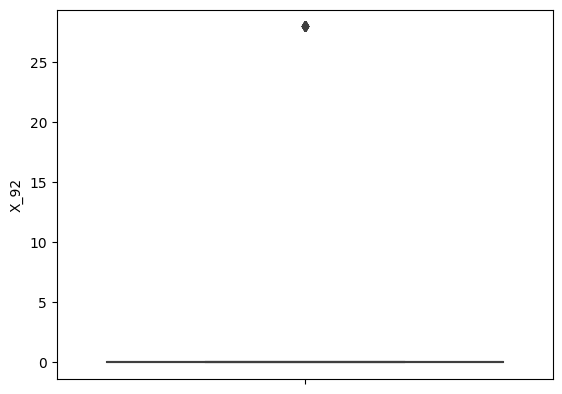

In [163]:
import seaborn as sns
sns.boxplot(y = 'X_92', data = train_df_0)

<AxesSubplot:>

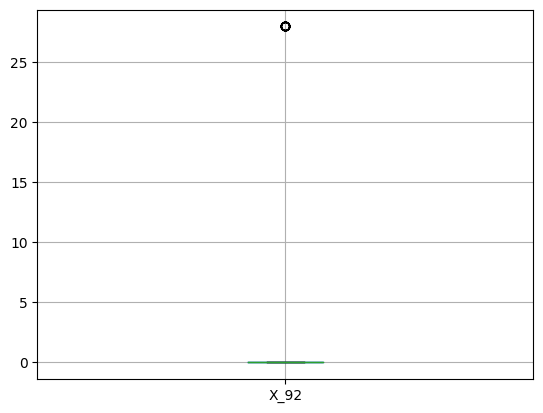

In [166]:
train_df_0.boxplot(column=['X_92'])

In [23]:
##########아웃라이어를 어떻게 제거해줄지 고민하다 끊겼음
value_type_num = train_df.nunique().tolist()
value_type_num

[598,
 3,
 583,
 598,
 6,
 3,
 10,
 16,
 1,
 2,
 13,
 2,
 2,
 1,
 251,
 178,
 169,
 2,
 4,
 8,
 5,
 1,
 67,
 72,
 66,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 5,
 2,
 10,
 12,
 11,
 12,
 11,
 9,
 14,
 12,
 12,
 13,
 12,
 14,
 12,
 13,
 15,
 11,
 14,
 15,
 16,
 13,
 19,
 11,
 19,
 8,
 13,
 13,
 10,
 1,
 1,
 1,
 1,
 1,
 23,
 1,
 1,
 2,
 2,
 2,
 1,
 4,
 1,
 1,
 1,
 2,
 2,
 1,
 13,
 15,
 16,
 1,
 42,
 52,
 33,
 1,
 49,
 54,
 47,
 1,
 46,
 81,
 39,
 1,
 2,
 2,
 2,
 1,
 29,
 31,
 48,
 24,
 23,
 1,
 349,
 175,
 175,
 174,
 174,
 78,
 78,
 42,
 42,
 3,
 2,
 3,
 1,
 67,
 67,
 73,
 99,
 93,
 107,
 2,
 4,
 1,
 108,
 1,
 31,
 32,
 35,
 2,
 3,
 3,
 1,
 2,
 3,
 3,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 3,
 1,
 2,
 2,
 2,
 1,
 2,
 2,
 2,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 27,
 8,
 8,
 8,
 8,
 7,
 7,
 9,
 9,
 9,
 9,
 8,
 8,
 9,
 8,
 8,
 9,
 8,
 8,
 8,
 8,
 7,
 13,
 12,
 12,
 8,
 7,
 10,
 10,
 7,
 13,
 8,
 6,
 8,
 8,
 8,
 7,
 2,
 4,
 3,
 9,
 1,
 37,
 1,
 27,
 27,
 1,